<a href="https://colab.research.google.com/github/Mircus/NeuroScan/blob/main/NeuroScan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Model structure:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6] 

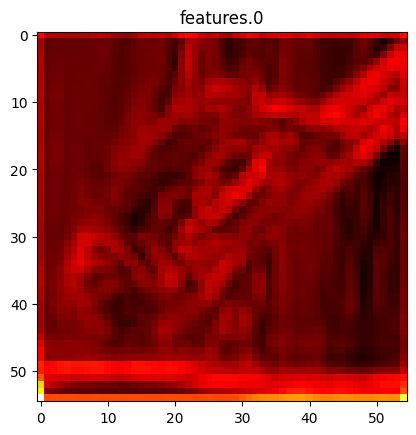

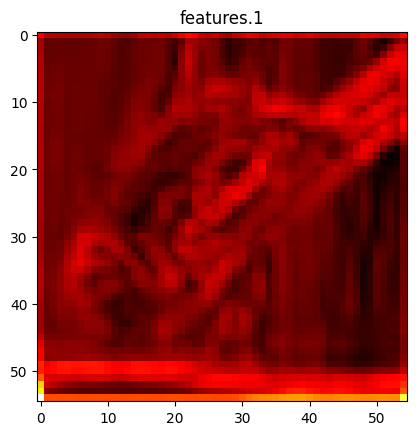

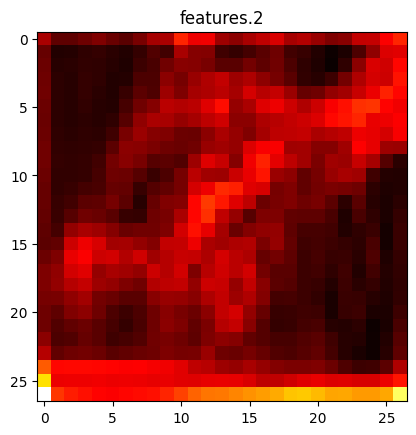

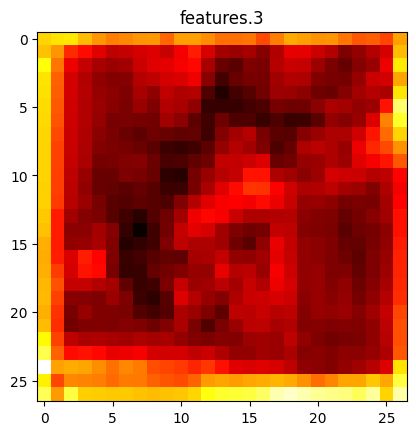

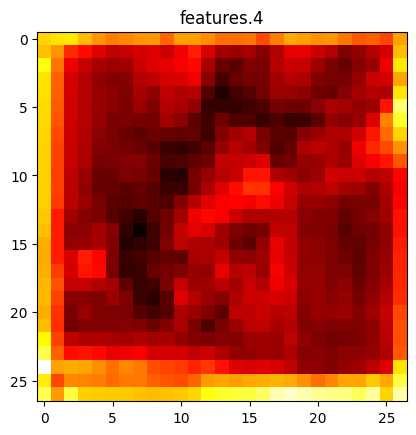

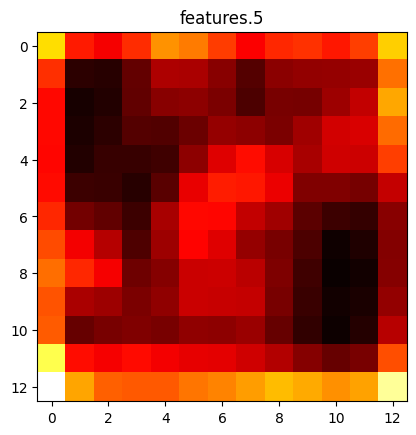

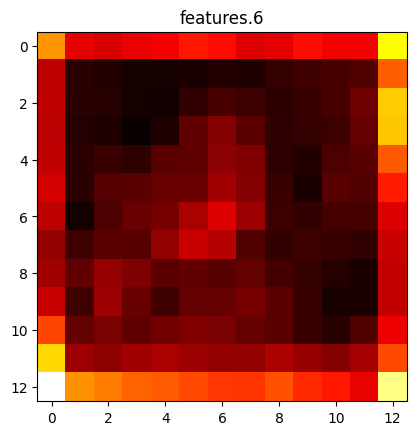

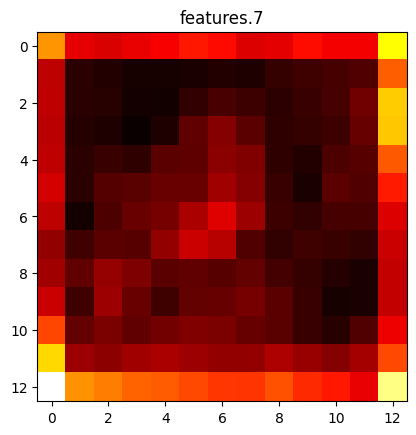

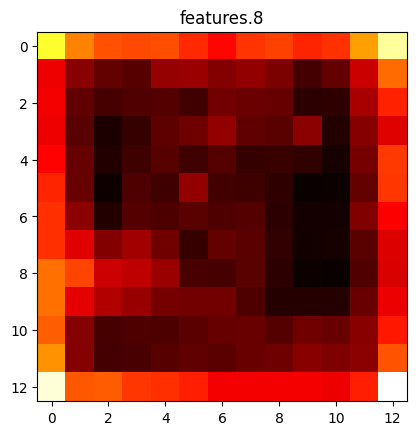

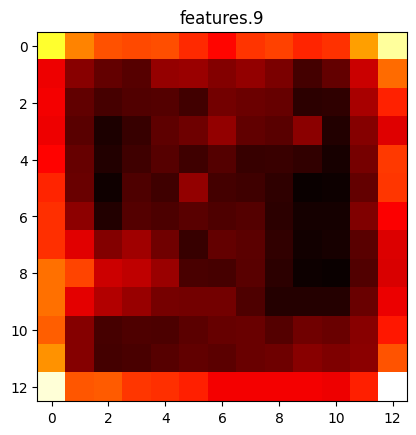

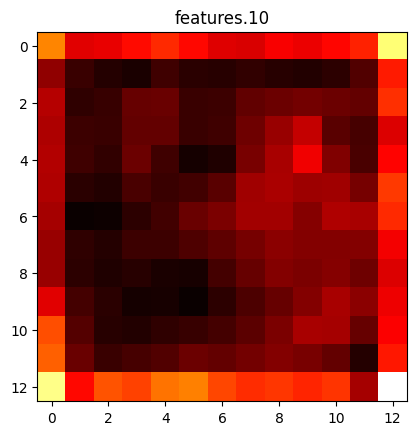

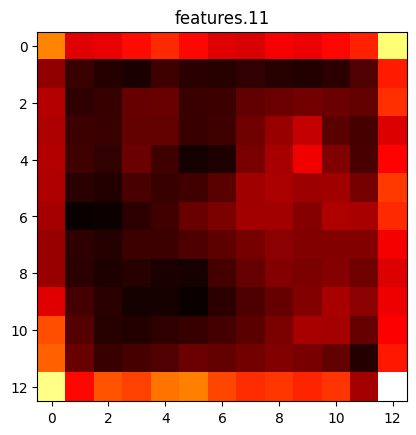

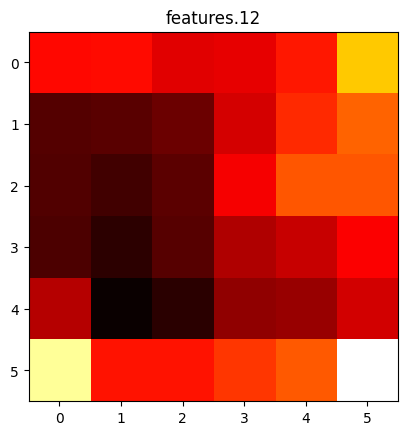

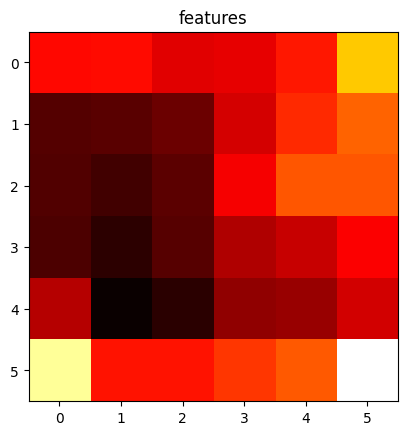

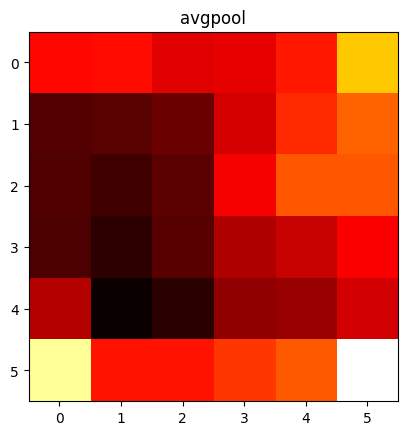

Cannot create a heatmap for classifier.0, activation shape: torch.Size([1, 9216])
Cannot create a heatmap for classifier.1, activation shape: torch.Size([1, 4096])
Cannot create a heatmap for classifier.2, activation shape: torch.Size([1, 4096])
Cannot create a heatmap for classifier.3, activation shape: torch.Size([1, 4096])
Cannot create a heatmap for classifier.4, activation shape: torch.Size([1, 4096])
Cannot create a heatmap for classifier.5, activation shape: torch.Size([1, 4096])
Cannot create a heatmap for classifier.6, activation shape: torch.Size([1, 1000])
Cannot create a heatmap for classifier, activation shape: torch.Size([1, 1000])
Cannot create a heatmap for , activation shape: torch.Size([1, 1000])


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torchvision.models import alexnet
from torch.autograd import Variable
import numpy as np
import torchvision
from torchsummary import summary

def visualize_activation_maps(model, image):
    # Ensure model is in eval mode
    model.eval()

    # Hook to capture the activations
    activations = {}
    def get_activation(name):
        def hook(module, input, output):
            activations[name] = output.detach()
        return hook

    # Register the hooks for all layers
    for name, layer in model.named_modules():
        layer.register_forward_hook(get_activation(name))

    # Pass the image through the model
    output = model(image)

    # Display heatmaps
    for name, act in activations.items():
        # Only create a heatmap for 2D or 3D (channel dimension included) activations
        if len(act.shape) == 3 or len(act.shape) == 4:
            plt.figure()
            plt.title(name)
            plt.imshow(act[0].mean(dim=0).cpu().numpy(), cmap='hot')
            plt.show()
        else:
            print(f'Cannot create a heatmap for {name}, activation shape: {act.shape}')

# define transform
transform = transforms.Compose([
    transforms.Resize(224), # Resize to fit AlexNet input dimensions
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load a single image (for simplicity)
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
image, _ = next(iter(dataloader))

# Load pretrained model
model = torchvision.models.alexnet(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
image = image.to(device)

# Print model's layers
print("Model structure:")
summary(model, input_size=(3, 224, 224)) # Input size should be modified based on your model's requirements

# Visualize
visualize_activation_maps(model, image)
